# Compute spin-spin correlation function from TWORDM

In [1]:
import numpy as np

k = 73
n = 114
s = 0

## twordm for Fe4S4

In [4]:
import rdmutils

twordm_spatial = rdmutils.get_twordm_spatialorbital_tensor(k,'fe8s7/rdm2mps.0.0.txt')

In [5]:
np.einsum('ijji->',twordm_spatial)

12882.0

In [6]:
n*(n-1)

12882

## rotate twordm to the original basis

In [8]:
import oodmrg_util

urot300 = oodmrg_util.loadUrot("fe8s7/urot300.txt",k)
urot300b = oodmrg_util.loadUrot("fe8s7/urot300b.txt",k)
urot300to500 = oodmrg_util.loadUrot("fe8s7/urot300to500.txt",k)

In [9]:
urot = urot300.dot(urot300b.dot(urot300to500))

In [10]:
twordm_spatial_lmo = rdmutils.twordm_backtransform(twordm_spatial,urot)

In [11]:
np.einsum('ijji->',twordm_spatial_lmo)

12881.999999996522

## spin-spin correlation funciton

In [12]:
orbs = [None]*14
orbs[0]  = [0,1,2]                           # _end
orbs[1]  = [3,4,5,6,7]                       # _fe1
orbs[2]  = [8,9,10,11,12,13,14]              # _s
orbs[3]  = [15,16,17,18,19]                  # _fe2
orbs[4]  = [20,21,22]                        # _s
orbs[5]  = [23,24,25,26,27]                  # _fe3
orbs[6]  = [28,29,30,31,32]                  # _fe4
orbs[7]  = [33,34,35,36,37,38,39]            # _s_middle
orbs[8]  = [40,41,42,43,44]                  # _fe5
orbs[9]  = [45,46,47,48,49]                  # _fe6
orbs[10] = [50,51,52,53,54,55,56,57,58]      # _s
orbs[11] = [59,60,61,62,63]                  # _fe7
orbs[12] = [64,65,66,67,68]                  # _fe8
orbs[13] = [69,70,71,72]                     # _end
groups = [orbs[1],orbs[3],orbs[5],orbs[6],\
	  orbs[8],orbs[9],orbs[11],orbs[12]]

In [16]:
import spinAnalysis

sisj = spinAnalysis.spinAnalysis(twordm_spatial_lmo,groups,k,n,s)


[spinAnalysis]: k,n,s= 73 114 0
<n>= 113.99999999996922
<s2>= 9.380585197504843e-11
igroup= 0 s2exp= 5.213479795064111 seff= 1.8374087779128647
igroup= 1 s2exp= 5.558451037071004 seff= 1.9100728281674404
igroup= 2 s2exp= 5.255374119938521 seff= 1.846353366383359
igroup= 3 s2exp= 5.361148110181597 seff= 1.8687862103156538
igroup= 4 s2exp= 5.295458154437158 seff= 1.85487964754829
igroup= 5 s2exp= 5.246599763532554 seff= 1.8444828349835607
igroup= 6 s2exp= 5.422858328147076 seff= 1.8817762968312275
igroup= 7 s2exp= 5.052781063204192 seff= 1.8027768157605268
s2sum= 1.223261620672234
[[ 5.2134798  -4.39869505 -4.01516282 -2.50580171  2.72209757  2.7837187
   2.04856532 -1.67798414]
 [-4.39869505  5.55845104  3.40777448  2.96325226 -3.43320783 -3.5109259
  -2.58372399  2.11633372]
 [-4.01516282  3.40777448  5.25537412  3.01204344 -3.49183628 -3.5708816
  -2.62784596  2.15247401]
 [-2.50580171  2.96325226  3.01204344  5.36114811 -4.04334251 -4.13483748
  -3.0428352   2.49237385]
 [ 2.7220975

In [20]:
ijdx = [7,5,4,6,2,3,1,0]
ijdx = np.ix_(ijdx,ijdx)
sisj_ordered = sisj[ijdx] # ordered Fe in the same ordering as in my previous paper

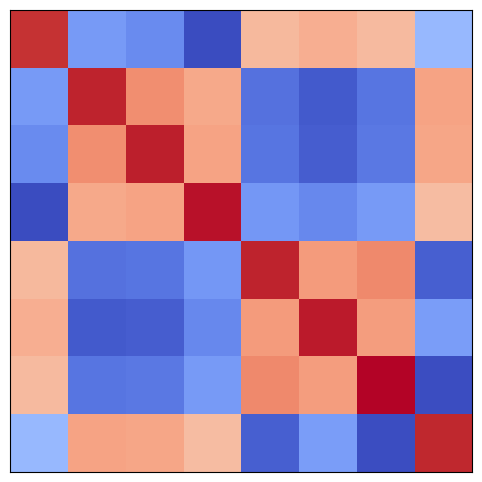

saved to fname= fe4s4.pdf


0

In [21]:
spinAnalysis.genSpinSpinPlot(sisj_ordered)

In [22]:
print(sisj)

[[ 5.2134798  -4.39869505 -4.01516282 -2.50580171  2.72209757  2.7837187
   2.04856532 -1.67798414]
 [-4.39869505  5.55845104  3.40777448  2.96325226 -3.43320783 -3.5109259
  -2.58372399  2.11633372]
 [-4.01516282  3.40777448  5.25537412  3.01204344 -3.49183628 -3.5708816
  -2.62784596  2.15247401]
 [-2.50580171  2.96325226  3.01204344  5.36114811 -4.04334251 -4.13483748
  -3.0428352   2.49237385]
 [ 2.72209757 -3.43320783 -3.49183628 -4.04334251  5.29545815  3.30588968
   2.78300371 -2.95596028]
 [ 2.7837187  -3.5109259  -3.5708816  -4.13483748  3.30588968  5.24659976
   2.63160549 -2.55243514]
 [ 2.04856532 -2.58372399 -2.62784596 -3.0428352   2.78300371  2.63160549
   5.42285833 -4.46510071]
 [-1.67798414  2.11633372  2.15247401  2.49237385 -2.95596028 -2.55243514
  -4.46510071  5.05278106]]
